<a href="https://colab.research.google.com/github/Shailee-Swastik/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Shailee_Swastik_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [13]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [14]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
#load the seol bike data set from drive
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Python/Projects/Bike sharing Demand Prediction-Capstone Project/SeoulBikeData.csv',encoding ='latin')

Let's Understand the dataset

In [17]:
#glimpse of top 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [18]:
#glimpse of bottom 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [19]:
#Getting the shape of Dataset
df.shape

(8760, 14)

In [20]:
print(f'Features of the Bike Sharing Dataset:')
df.columns

Features of the Bike Sharing Dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [21]:
#Check the Details of the Bike Sharing Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [22]:
#print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [23]:
#Description of the dataset to get insights of the datasets
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


It's a yearly dataset on hourly basis=365*24=8760 hours.

# **Features description**

Breakdown of Our Features:

Date : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

Rented Bike Count : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

Hour: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

Temperature(°C): Temperature in Celsius, type : Float

Humidity(%): Humidity in the air in %, type : int

Wind speed (m/s) : Speed of the wind in m/s, type : Float

Visibility (10m): Visibility in m, type : int

Dew point temperature(°C): Temperature at the beggining of the day, type : Float

Solar Radiation (MJ/m2): Sun contribution, type : Float

Rainfall(mm): Amount of raining in mm, type : Float

Snowfall (cm): Amount of snowing in cm, type : Float

Seasons: *Season of the year, type : str, there are only 4 season's in data *.

Holiday: If the day is holiday period or not, type: str

Functioning Day: If the day is a Functioning Day or not, type : str

# **Preprocessing the dataset**

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set.

**Handling the Missing Values,why?**




* Because most of the machine learning models that you want to use will provide an error if you pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce your model accuracy significantly.




In [24]:
#Check for missing values
df.isna().sum()
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Great!No Missing Values

\\Duplicate Values, Remove?


*  "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person





In [25]:
# Checking Duplicate Values
v=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",v)

The number of duplicate values in the data set is =  0


In the Above Dataset there are no Missing Values and Duplicate values



**Changing the Column name**

In [26]:
#Rename the complex columns name
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                      'Temperature(°C)':'Temperature',
                      'Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_Speed',
                      'Visibility (10m)':'Visibility',
                      'Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation',
                      'Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall',
                      'Functioning Day':'Functioning_Day'})

# **Fragmentation of the Date column**

In [27]:
  # Changing the "Date" column into three "year","month","day" column
df['Date'] = df['Date'].apply(lambda x:dt.datetime.strptime(x,"%d/%m/%Y"))
                              

In [28]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

In [29]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day"
df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day'],axis=1)

In [30]:
df.head()


,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_Speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  year                   8760 non-null   int64  
 14  month                  8760 non-null   int64  
 15  week

In [32]:
df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

# **Converting the Datatype**

It is necessary to convert Datatype as"Hour","year","Month","weekdays_weekend"columns are shown as an integer data type but actually these are category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.

In [33]:
#Convert the int64 column into catagory column
cols=['Hour','year','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')


df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_Speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  year                   8760 non-null   category
 14  month                  8760 non-null   c

# **EDA**

Exploratory data analysis is essential for any business. It allows data scientists to analyze the data before coming to any assumption. It ensures that the results produced are valid and applicable to business outcomes and goals. 


The primary objective of exploratory data analysis in order to perform exploratory data analysis is to uncover the underlying structure. The structure of the various data sets determines the trends, patterns, and relationships among them.

# **Analyze of Categoricalcal variables**

**Busiest Month**





[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

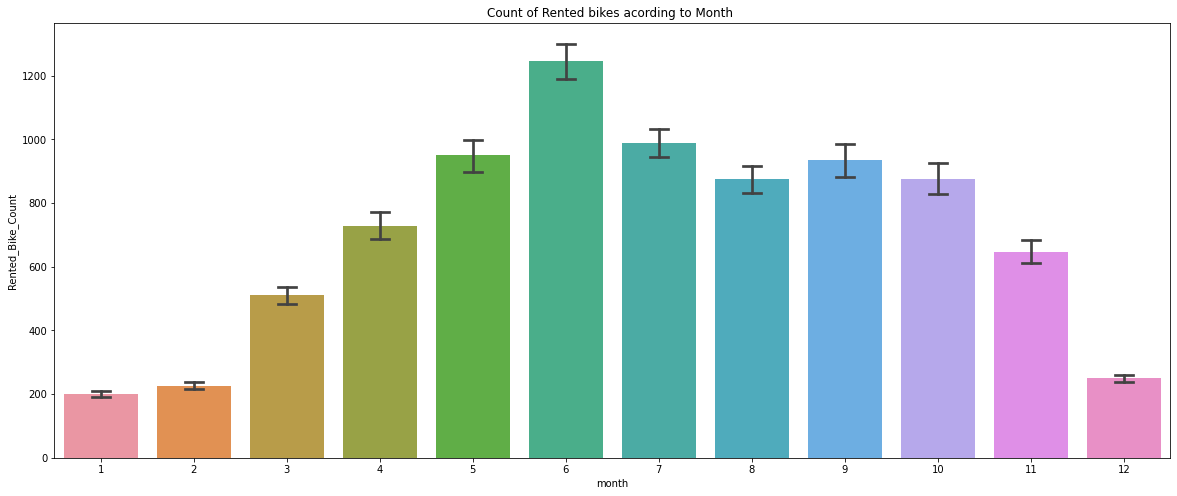

In [34]:
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

visulizing the Above barplot for the busiest Month are from May-Oct this depicts as Summer season where visibilty is high,snowfall is negligble and temperature is not very low.

 **Busiest Hour on Weekend and Weekdays**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

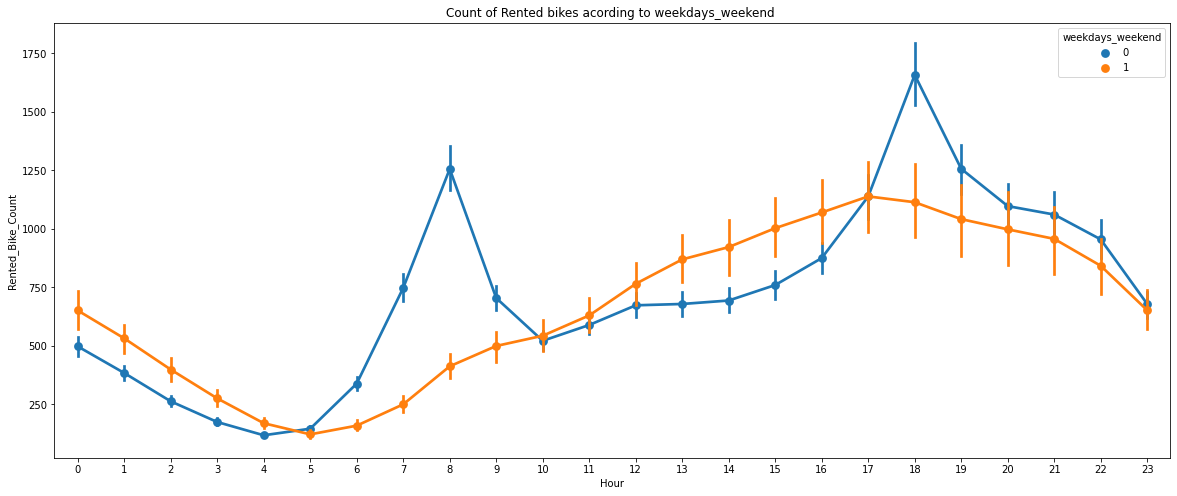

In [35]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

Orange pointplot depicting the weekends of the week which is low in the  Early morning hour increasing with each hour from 6a.m. to 5p.m..
 and after that it start declining because of the low temperature in evening and in night.




Blue pointplot depicting the weekdays of the week which is low in early hours but it start rising with eeach hour and reach its peak point at 8 a.m (between 5a.m to 9 a.m.). 
soon it starts decling but after 11.a.m in the morning it count is start rising
reach its peak point at 6p.m. after that it starts decreasing.



Busiest Hour-people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.

**Seasons in Seol**

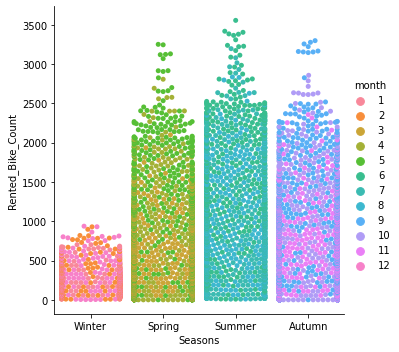

In [36]:
#Analysing the seasons of seol monthwise
sns.catplot(x="Seasons", y='Rented_Bike_Count', hue="month", kind="swarm",data=df)

Monthlywise Saesons in Seol

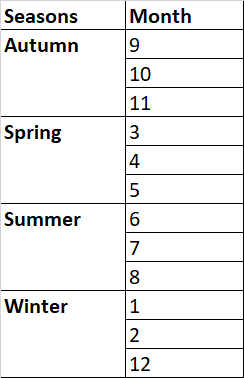

**Rental Bikes on Holiday and Non Holiday**

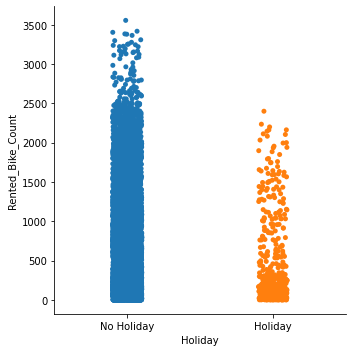

In [37]:
#Analysing the bike counts of seol on Holiday and Non Holiday

sns.catplot(x="Holiday", y="Rented_Bike_Count", data=df)

On Non Holiday there is more demand of bikes beacuse of the working hours in Seol.

# **Analyze of Numerical variables**

Text(0.5, 0, 'Rented_Bike_Count')

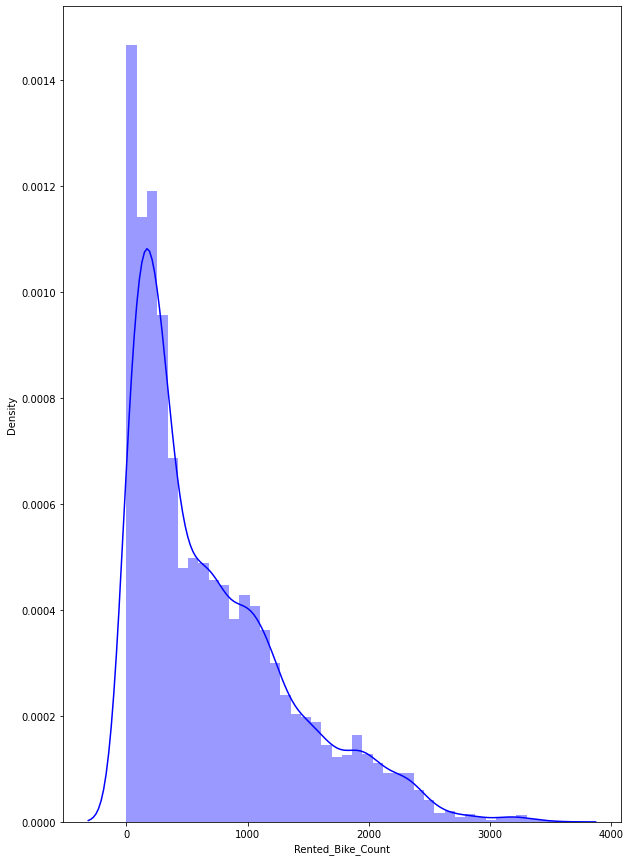

In [38]:
plt.figure(figsize=(10,15))
sns.distplot((df['Rented_Bike_Count']),color='b')
plt.xlabel('Rented_Bike_Count')

As we can see that Rented_Bike_count is right skewed,Hence we have to log normally distribute the dataset.

Log scaling computes the log of the values to compress a wide range to a narrow range. In other words, it helps convert a skewed distribution to a normal distribution/less-skewed distribution.

Text(0.5, 0, 'Rented_Bike_Count')

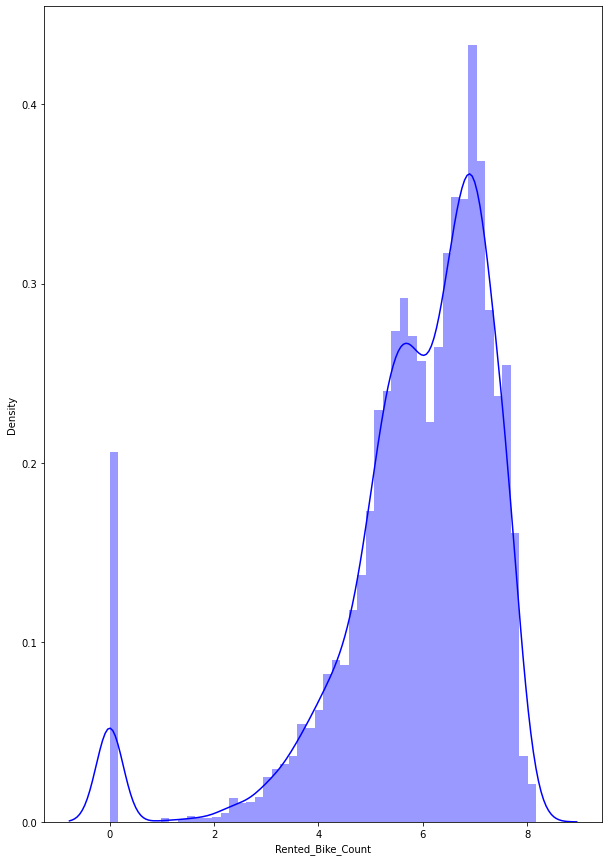

In [39]:
plt.figure(figsize=(10,15))
sns.distplot(np.log1p(df['Rented_Bike_Count']),color='b')
plt.xlabel('Rented_Bike_Count')

Here in the above graph there is an outlier effect on 0 this is because of the Non Functioning Day and there is Rental Bike used.

In [40]:
#Analyse the data on the Functioning Days of Rental_Bike_service
opt=["Yes"]
Func_day=df.loc[df['Functioning_Day'].isin(opt)]
Func_day

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,0


Text(0.5, 0, 'Rented_Bike_Count')

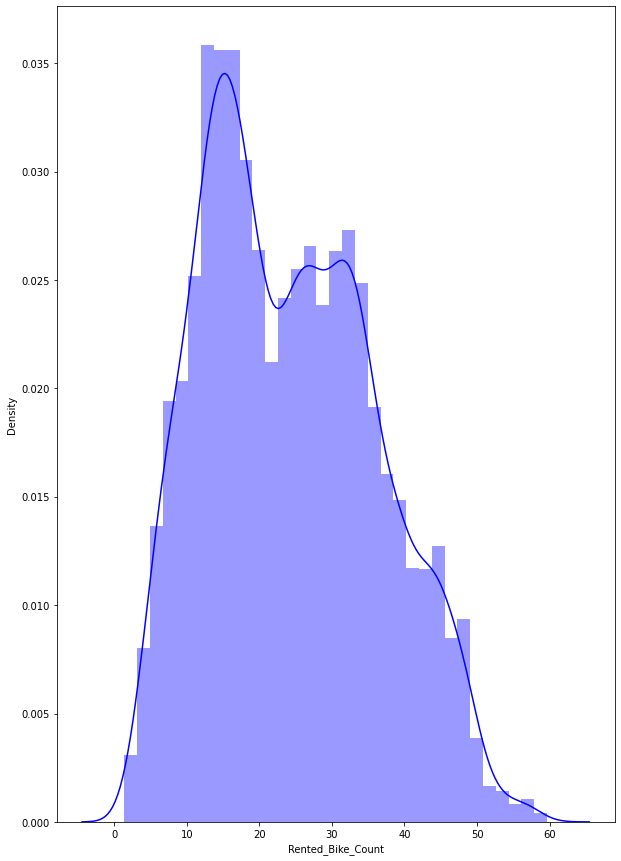

In [41]:
plt.figure(figsize=(10,15))
sns.distplot(np.sqrt(Func_day['Rented_Bike_Count']),color='b')
plt.xlabel('Rented_Bike_Count')

In [42]:
#assign the numerical coulmn to variavle
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

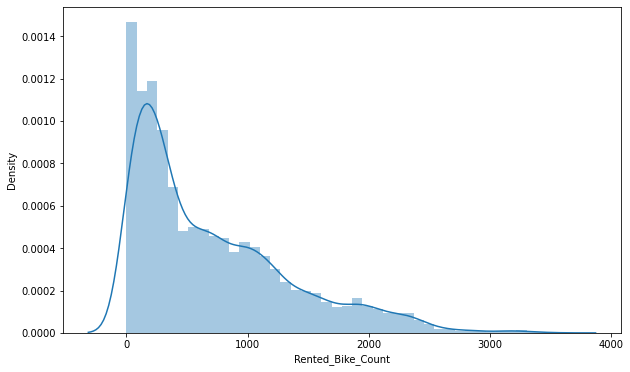

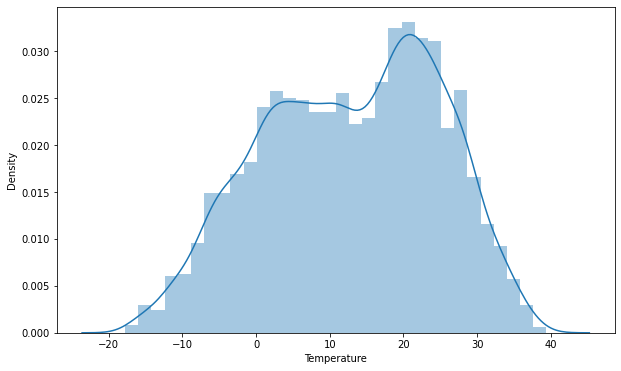

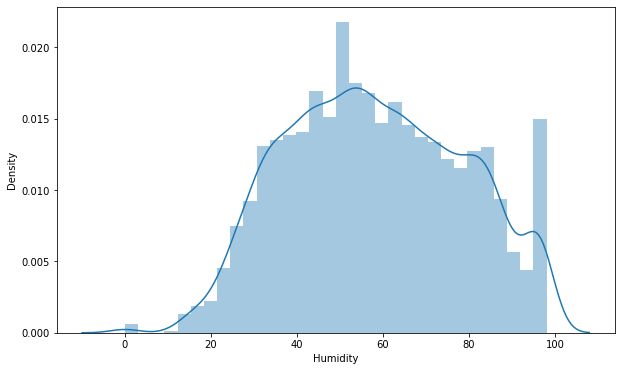

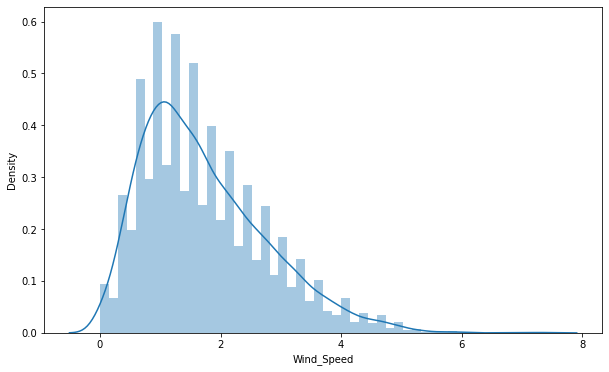

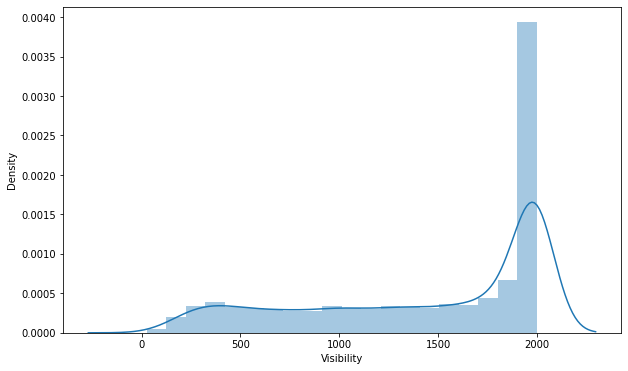

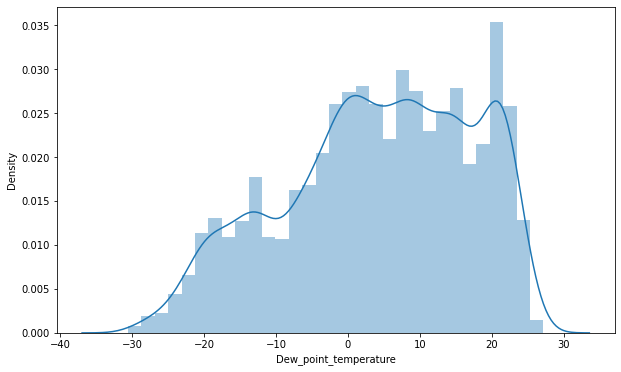

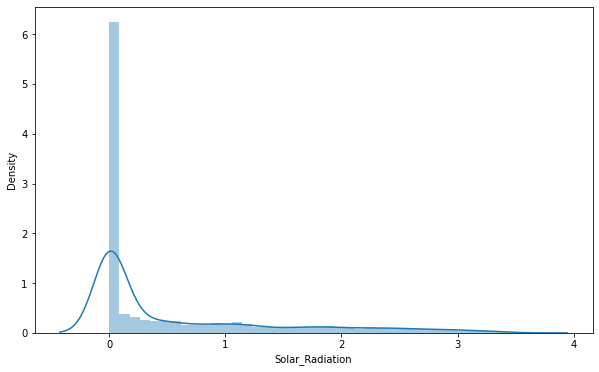

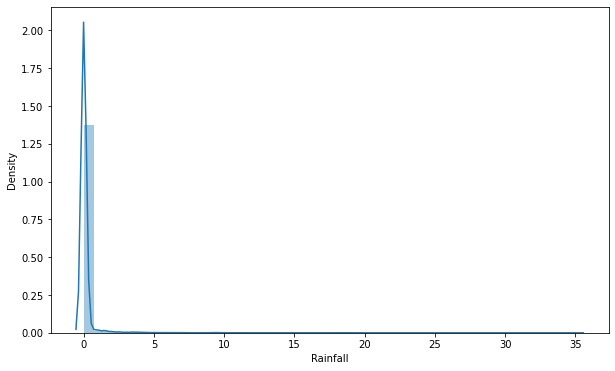

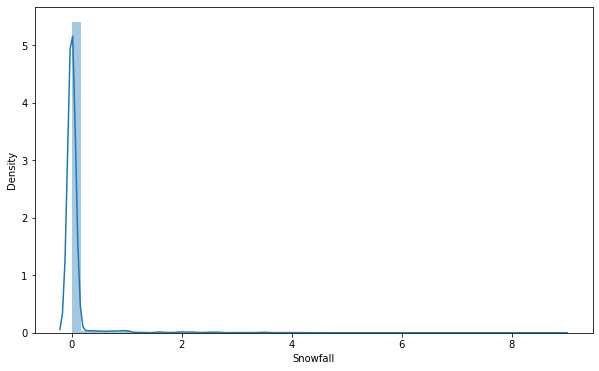

In [43]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

Temperature,Dew_point_Temperature and Humidity are almost normally distributed whereas Wind_Speed,Solar_Radiation,Rainfall and Snowfall are right skewewd and visibility is left skewed

**Numerical Dataset VS Rented_Bike_Count**

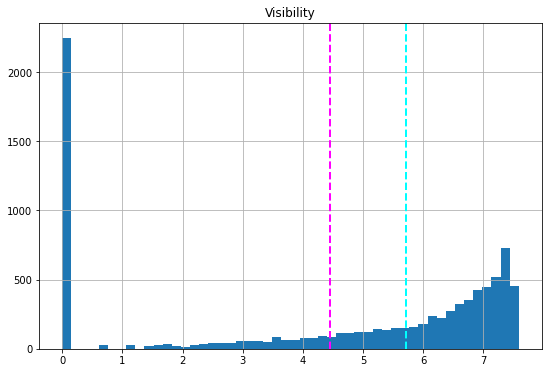

In [44]:
#For Left Skewed data....
#Plot a bar plot for each categorical feature count (except car_ID)
for col in numerical_features[4:5]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(max(df[col]+1) - df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

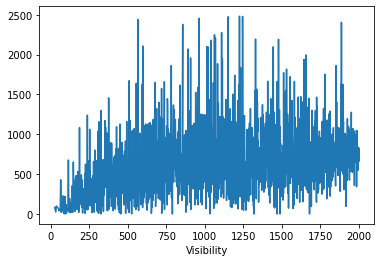

In [45]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('Visibility').mean()['Rented_Bike_Count'].plot()

Demand of Bike count is more around visibility(10m) lies between 1500-2000. 

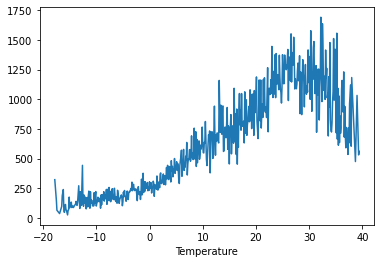

In [46]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

Demand of Bike count is more around when there the temperature is around 25°C.

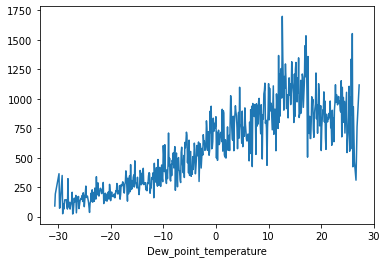

In [47]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.


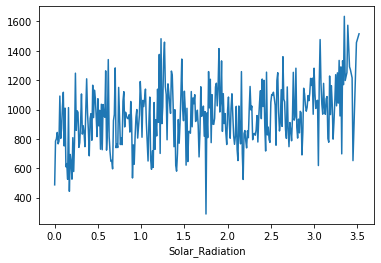

In [48]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation" 
df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

The Above plot describe there the most of the bike demands revolves around 1000 counts with respect to varying the solar radiation.

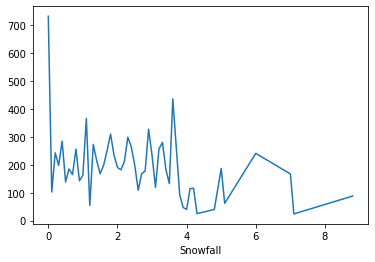

In [49]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

The Demand of Bike demands decreases after 4cm as the snowfall is not suitables for the bike riding.

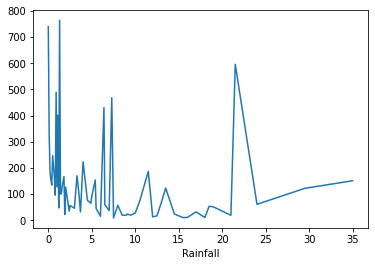

In [50]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()


Rainfall has littl effect on Demands of Bike.In the above plot we can see there is high demand on 21mm Rainfall there is high demand of Bikes around 596 in June.

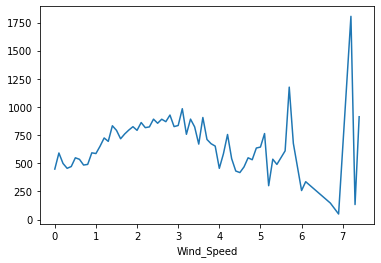

In [51]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed" 
df.groupby('Wind_Speed').mean()['Rented_Bike_Count'].plot()

The demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.

# **Regression plot**

**Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**

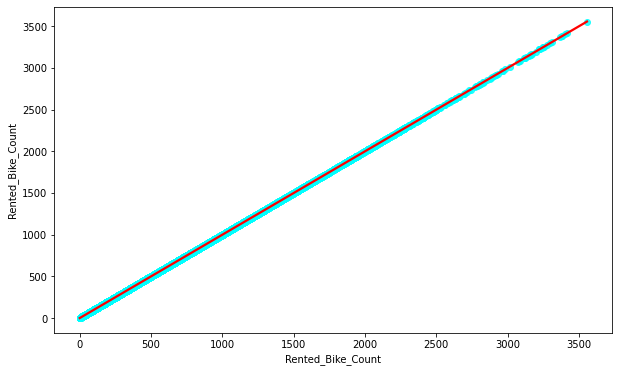

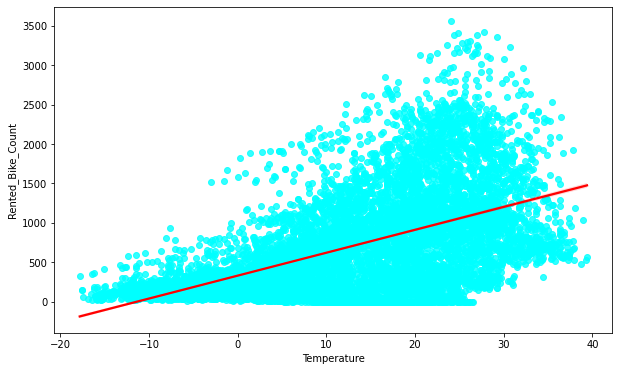

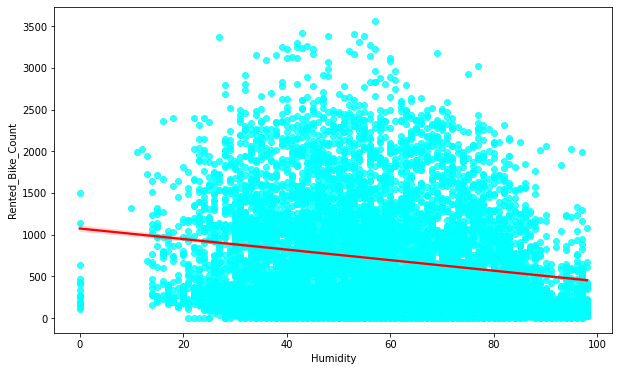

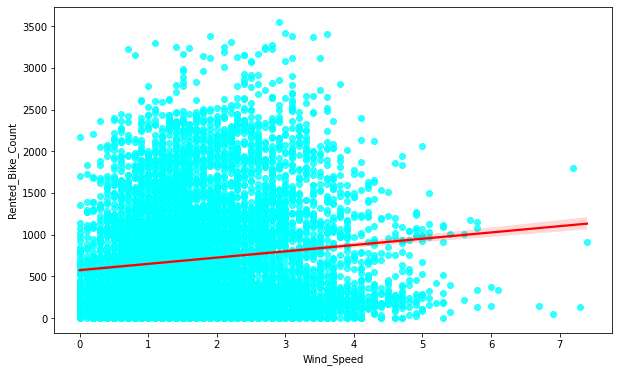

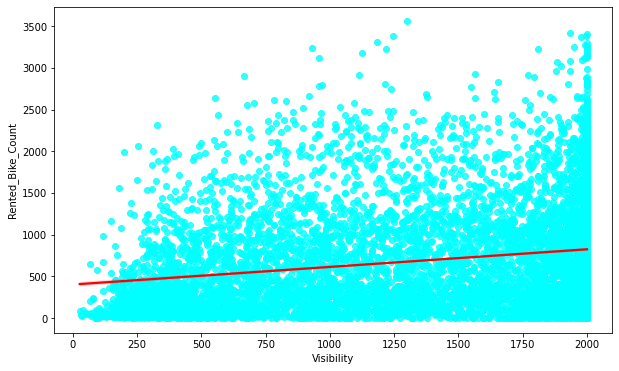

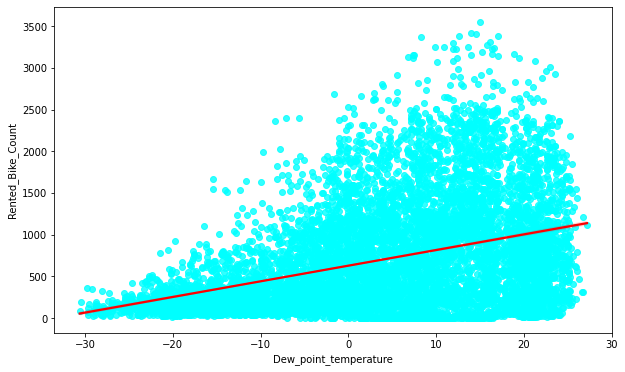

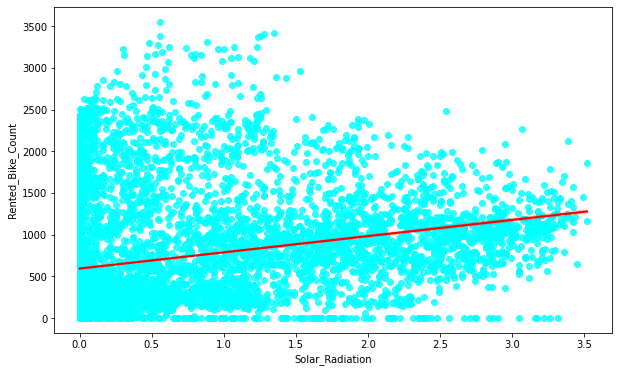

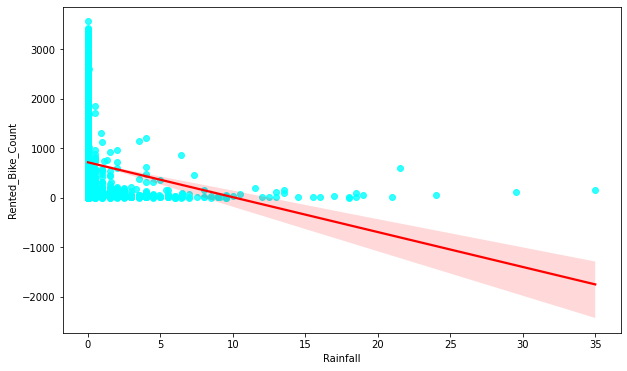

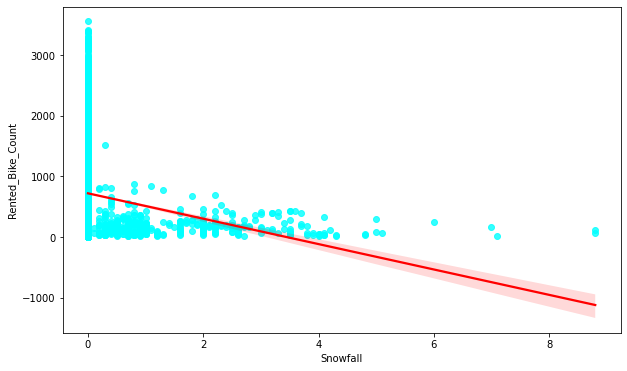

In [52]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'cyan'}, line_kws={"color": "red"})

In the Above Regression plots we can see that 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to Rented_Bike_Count(Demand).which means with increase in these features the demand of rented bike increases.


'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.




# Normalise Rented_Bike_Count column data


 ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

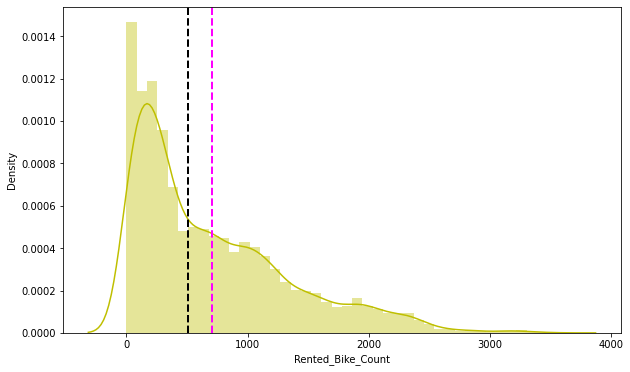

In [53]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

The above graph shows that Rented Bike Count has moderate right skewness.As there is assumption in Linear regression is that Dependent variable should be Normally distributed.

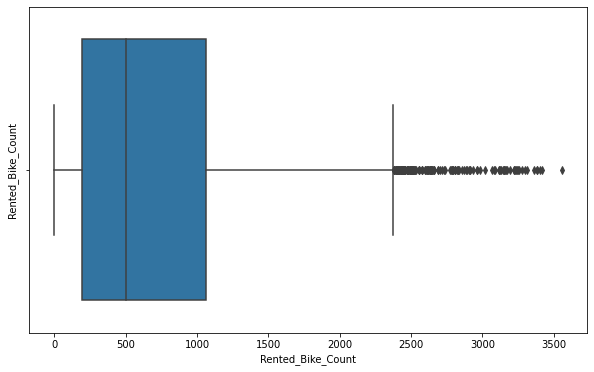

In [54]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

Box Plot depicts that there are outliers in the 'Rented_Bike_Count'.

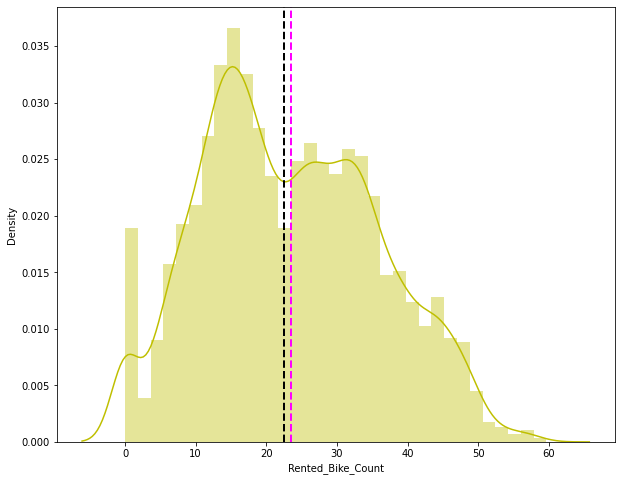

In [55]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

In the Above graph we can see that 'Mean' and 'Median' are almost same. visulizing the graph this formed bell shaped curve as well.

Hence,We almost got the Rented_Bike_Count(Dependent Variable) normally Distributed.

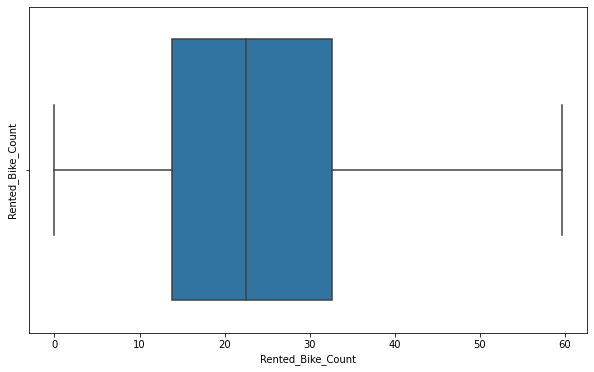

In [56]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

After Apllying sqrt for normally distributing the dependent variable,we can detect there are no outliers.

# **Correlation between Variables**

In [57]:
df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_Speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


# **Checking in OLS Model**

In [58]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = df[[ 'Temperature','Humidity',
       'Wind_Speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = df['Rented_Bike_Count']
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,0


In [59]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [60]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:29:06   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_Speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



*   R-squared and Adj. R-squared lies between 0.3 and 0.5 means moderate effect on the dependent variable. about 40% of variance in the Rented Bike count is explained by the model.

R-squared and Adj. R-squared are close enough so we have selected the relevant features.



*   t – statistics are calculated by assuming  following hypothesis – 

> H0  : B2  = 0       ( variable X has no influence on Y)

> Ha  : B2  ≠ 0      (X has significant impact on Y)


*   F-statistic used for assessing the level of significance of overall regression model.
F-statistic value is large and Prob (F-statistic) is 0, we can reject the null hypothesis as there are the evidence  indicating that there are linear relationship between numeric independent features and dependent feature.


*   Multicollinearity:-
Features with P-value less than 0.05 reject the null hypothesis and accept the alternate hypothesis.Here we can see P value of dew point temp and visibility are very high and they are not significant.


*  Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.


* The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems


*   Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.


# **Checking the Multicollinearity**

In [61]:
X.corr()

,const,Temperature,Humidity,Wind_Speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_Speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000




*   Analysing the OLS Model we find that 'Temperature' and 'Dew_point_temperature' are highly correlated so we need to drop one of them.
*   for droping the we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column.


**Let's Visualise the Multicollinearity with the help of HEAT MAP.**



**Heat Map**

we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables.

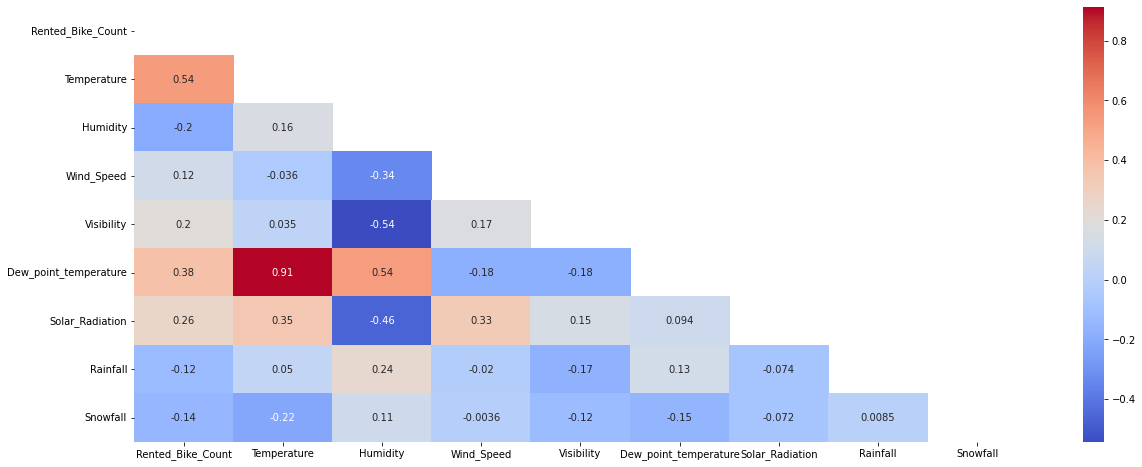

In [62]:
## plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

**From the Above presentation we analyse that the following are the collinear to the Target Variable.**
  
  
  Positively Correlated
  

*   Temperature
*   Dew_Point_Temperature
*   Solar Radiation
  

  Negatively Correlated


*   Humidity
*   Rainfall
*   Snowfall


**Multicolinearity**

From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.


In [63]:
#drop the Dew point temperature column
df=df.drop(['Dew_point_temperature'],axis=1)


In [64]:
#dropping the year because this is irrelevant for analysing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_Speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  year               8760 non-null   category
 13  month              8760 non-null   category
 14  weekdays_weekend   8760 non-null   category
dtypes: category(4), float64(5), int64(3), object(3)
memory 

# **Feature Engineering**

# **Dummy Variable Creation**

A dummy variable is a numeric variable which represents the sub-categories or sub-groups of the categorical variables of the dataset.

In a nutshell, a dummy variable enables us to differentiate between different sub-groups of the data and which in terms enables us to use the data for regression analysis as well.

In [65]:
#Assign all catagoriacla features to a variable
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'year', 'month',
       'weekdays_weekend'],
      dtype='object')

# **One Hot Encoding**

One-hot encoding is essentially the representation of categorical variables as binary vectors. These categorical values are first mapped to integer values. Each integer value is then represented as a binary vector that is all 0s (except the index of the integer which is marked as 1).

In [66]:
#creat a copy
dfc = df

def one_hot_encoding(data, column):
  data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
  data = data.drop([column], axis=1)
  return data

for col in categorical_features:
  dfc = one_hot_encoding(dfc, col)
dfc.head()  

,Rented_Bike_Count,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **Various Model Trainings**

Here comes the fun part! We’re now going to build some regression models.

**Data Splitting**


Data splitting allows unbiased evaluation of the model’s performance on fresh data that was not previously seen by the model. Particularly, if the full dataset is split into a training set and a testing set using an 80/20 split ratio then the model could be built using the 80% data subset (i.e. which we can call the training set) and subsequently evaluated on the 20% data subset (i.e. which we can call the test set).

In [67]:
#Assign the value in X and Y
X = dfc.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(dfc['Rented_Bike_Count'])

In [68]:
#Training Set
X.head()

,Temperature,Humidity,Wind_Speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [69]:
#Testing Set
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [70]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 48)
(2190, 48)


In [71]:
dfc.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_Speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'year_2018', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned} 
​
  
* R 
2
 =1− 
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


# **LINEAR REGRESSION**

Let’s start with the traditional linear regression.



Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and 
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.


In [72]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [73]:
#check the score
reg.score(X_train, y_train)

0.7722101546453489

In [74]:
#check the coefficeint
reg.coef_

array([ 5.11538399e-01, -1.27236370e-01, -2.90120106e-02,  9.90622459e-04,
        8.89700978e-01, -1.48171450e+00, -8.13624722e-02, -2.04211013e+00,
       -4.95822601e+00, -7.23630405e+00, -9.51882170e+00, -9.04457905e+00,
       -4.03213967e+00,  2.27462868e+00,  7.54439022e+00,  1.25491492e+00,
       -3.27047337e+00, -3.46014083e+00, -2.74135757e+00, -2.96341095e+00,
       -3.18317895e+00, -1.92136313e+00,  1.11919297e-01,  3.83216168e+00,
        1.02397841e+01,  6.78230315e+00,  6.08102845e+00,  6.20280479e+00,
        5.04597741e+00,  1.46736051e+00,  1.67321309e+09,  1.37289711e+09,
        1.98174743e+09,  3.51130853e+00,  2.82758277e+01, -5.24268944e+08,
       -8.13449633e-01,  3.08534344e+08,  3.08534345e+08,  3.08534347e+08,
        6.08850327e+08,  6.08850321e+08,  6.08850319e+08,  1.98174743e+09,
        1.98174743e+09,  1.98174743e+09, -5.24268942e+08, -1.42458865e+00])

In [75]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

**Model performance**



In [76]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
from sklearn.metrics import mean_absolute_error
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.077512909638635
RMSE : 5.92262719657743
MAE : 4.474024562855397
R2 : 0.7722101546453489
Adjusted R2 : 0.7671032361133436


Linear model where the R2 value is 77%. Here r squared meaning would be that the model explains 77% of the fitted data in the regression model.



Lets save it in a dataframe for later comparisons.

In [77]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [78]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 33.27533177220437
RMSE : 5.7684774223536985
MAE : 4.410178921154902
R2 : 0.7893518427489804
Adjusted R2 : 0.7846292310964587


**The r2_score for the test set is 0.78. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [79]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

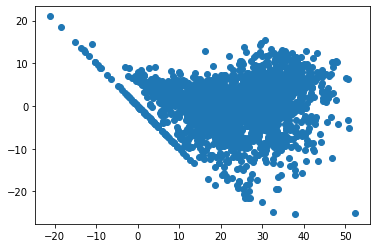

In [80]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

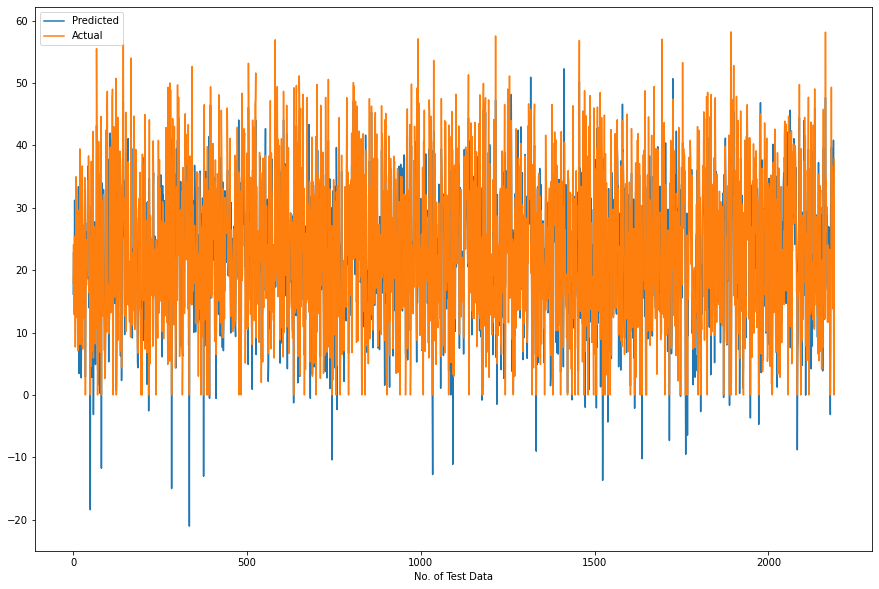

In [81]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No. of Test Data')
plt.show()

#**LASSO REGRESSION** 


In [82]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3873692800799008 0.40519624904934015


In [83]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

Model performance

In [84]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3918610878883725


**Looks like our r2 score value is 0.40 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [85]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [86]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.3736344484329298


**The r2_score for the test set is 0.38. This means our linear model is  not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [87]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

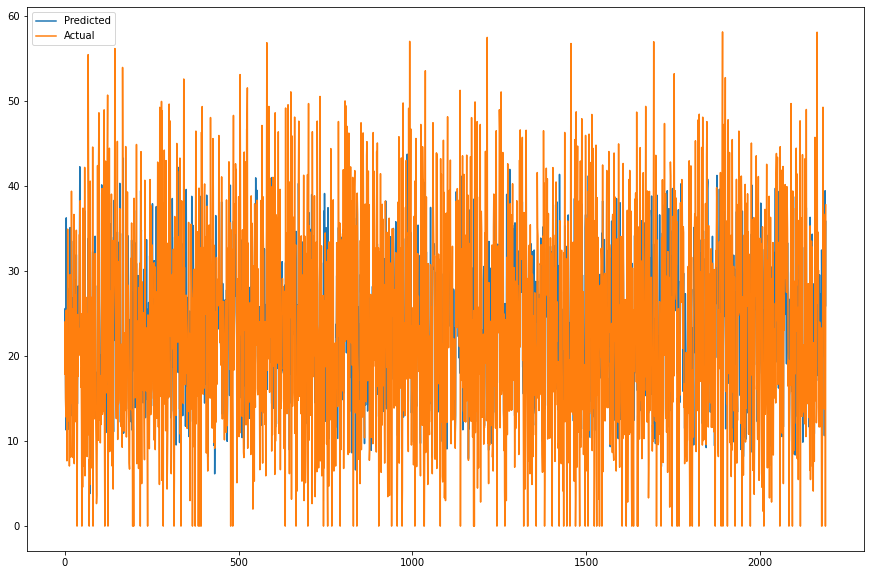

In [88]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

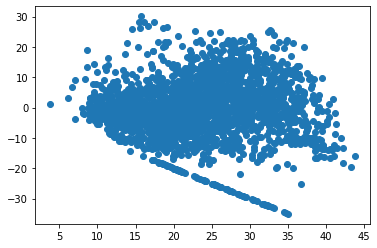

In [89]:
# Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

# **RIDGE REGRESSION**

In [90]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [91]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [92]:
#check the score
ridge.score(X_train, y_train)

0.7722100792866643

In [93]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

**Model Performance**

In [94]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.077524514173625
RMSE : 5.922628176255338
MAE : 4.474126779980472
R2 : 0.7722100792866643
Adjusted R2 : 0.7671031590651602


**Looks like our r2 score value is 0.77 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [95]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [96]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 33.27679367491808
RMSE : 5.768604135743593
MAE : 4.410416695378863
R2 : 0.7893425882323063
Adjusted R2 : 0.7846197690987943


**The r2_score for the test set is 0.78. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [97]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

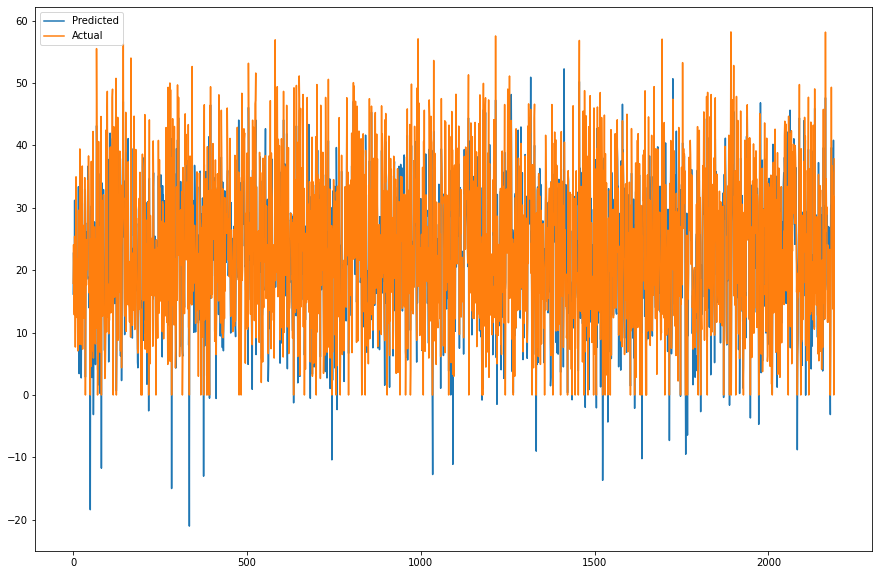

In [98]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

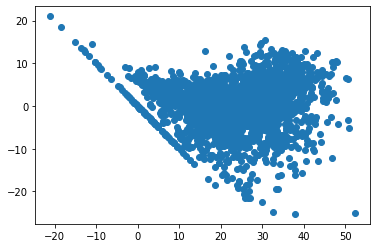

In [99]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# **ELASTIC NET REGRESSION**

In [100]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [101]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [102]:
#check the score
elasticnet.score(X_train, y_train)

0.6261384873710151

In [103]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

**Model Performance**

In [104]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 57.571188106487185
RMSE : 7.587567996827915
MAE : 5.791967576246186
R2 : 0.6261384873710151
Adjusted R2 : 0.617756725294326


**Looks like our r2 score value is 0.62 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [105]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [106]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 59.447389935780265
RMSE : 7.7102133521570115
MAE : 5.873143153763592
R2 : 0.6236706750489793
Adjusted R2 : 0.6152335860262568


**The r2_score for the test set is 0.62. This means our linear model is  performing average on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [107]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

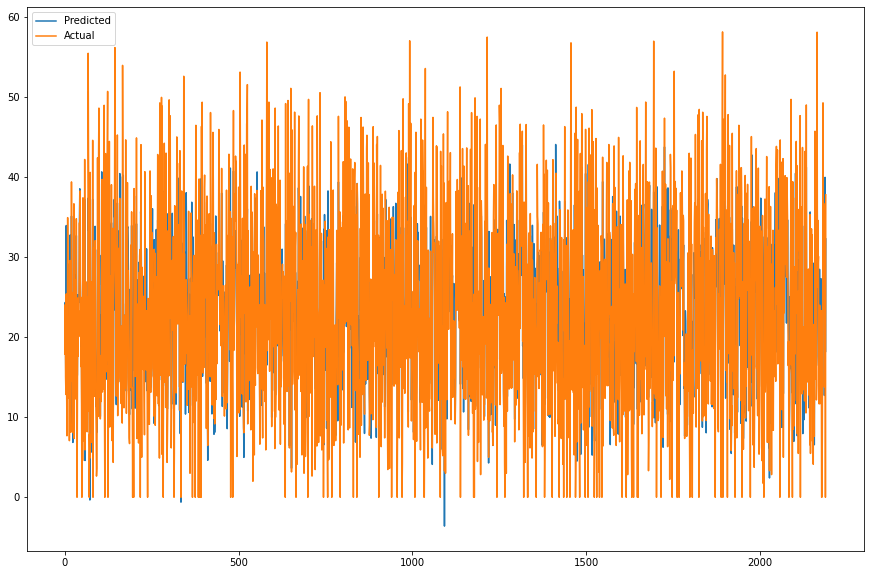

In [108]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

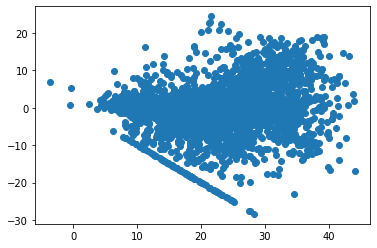

In [109]:
# Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

# **DECISION TREE**

In [110]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [111]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

Model Performance

In [112]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.6327940967538421
MSE : 56.54628629980592
RMSE : 7.519726477725498
MAE : 5.5027485055832415
R2 : 0.6327940967538421
Adjusted R2 : 0.624561549646969


**Looks like our r2 score value is 0.63 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [113]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [114]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 62.67964561084699
RMSE : 7.917047783792074
MAE : 5.8221606982422704
R2 : 0.6032090097415368
Adjusted R2 : 0.5943131818422345


**The r2_score for the test set is 0.60. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [115]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

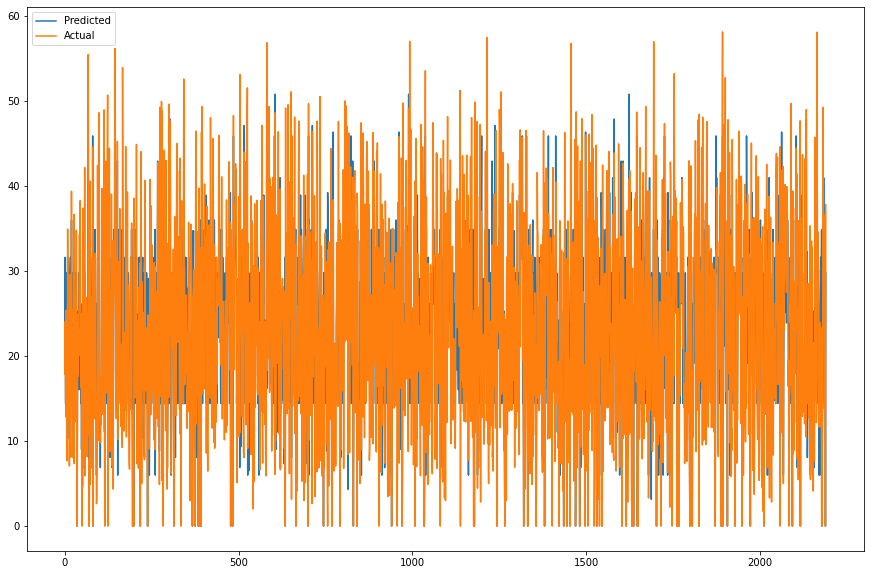

In [116]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

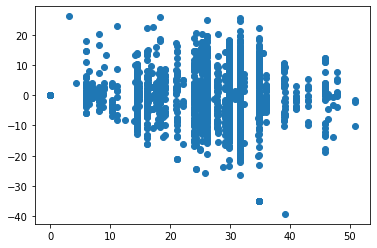

In [117]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

# **RANDOM FOREST**

In [118]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [119]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

**Model Performance**

In [120]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9898455785838759
MSE : 1.5636862466781152
RMSE : 1.2504744086458208
MAE : 0.8047368306674592
R2 : 0.9898455785838759
Adjusted R2 : 0.9896179222419917


**Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [121]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [122]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.783855834974043
RMSE : 3.5754518364780195
MAE : 2.20469404833133
R2 : 0.919072311806387
Adjusted R2 : 0.9172579591518829


**The r2_score for the test set is 0.91. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [123]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

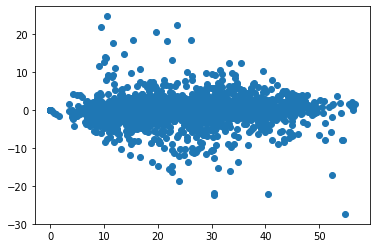

In [124]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [125]:
rf_model.feature_importances_

array([3.11544074e-01, 1.61387286e-01, 1.23634299e-02, 1.22553605e-02,
       3.15374365e-02, 3.12150726e-02, 1.39990531e-03, 4.50258400e-03,
       1.28884322e-02, 1.98822736e-02, 2.77117762e-02, 2.44537282e-02,
       7.60800109e-03, 4.14431775e-03, 1.40735849e-02, 1.09465007e-03,
       2.40745636e-03, 1.17258219e-03, 3.10394467e-04, 2.78592152e-04,
       4.64301927e-04, 1.32610052e-03, 3.58368039e-03, 1.03151532e-02,
       3.09968759e-02, 1.81879833e-02, 1.25925565e-02, 1.31565704e-02,
       1.08604093e-02, 4.45884470e-03, 4.01868405e-03, 8.43487988e-04,
       6.66274719e-03, 3.90446261e-03, 1.54774423e-01, 3.74382526e-04,
       2.95158485e-04, 3.88120061e-03, 1.10950893e-03, 1.54755306e-03,
       2.46716241e-03, 7.50288313e-04, 2.52948348e-03, 8.42390782e-04,
       2.70409944e-03, 5.26089111e-03, 5.19881160e-04, 1.93407810e-02])

In [126]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [127]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [128]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
34,Functioning_Day_Yes,0.15
5,Rainfall,0.03
10,Hour_4,0.03
24,Hour_18,0.03
4,Solar_Radiation,0.03
47,weekdays_weekend_1,0.02
9,Hour_3,0.02
11,Hour_5,0.02


In [129]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [130]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

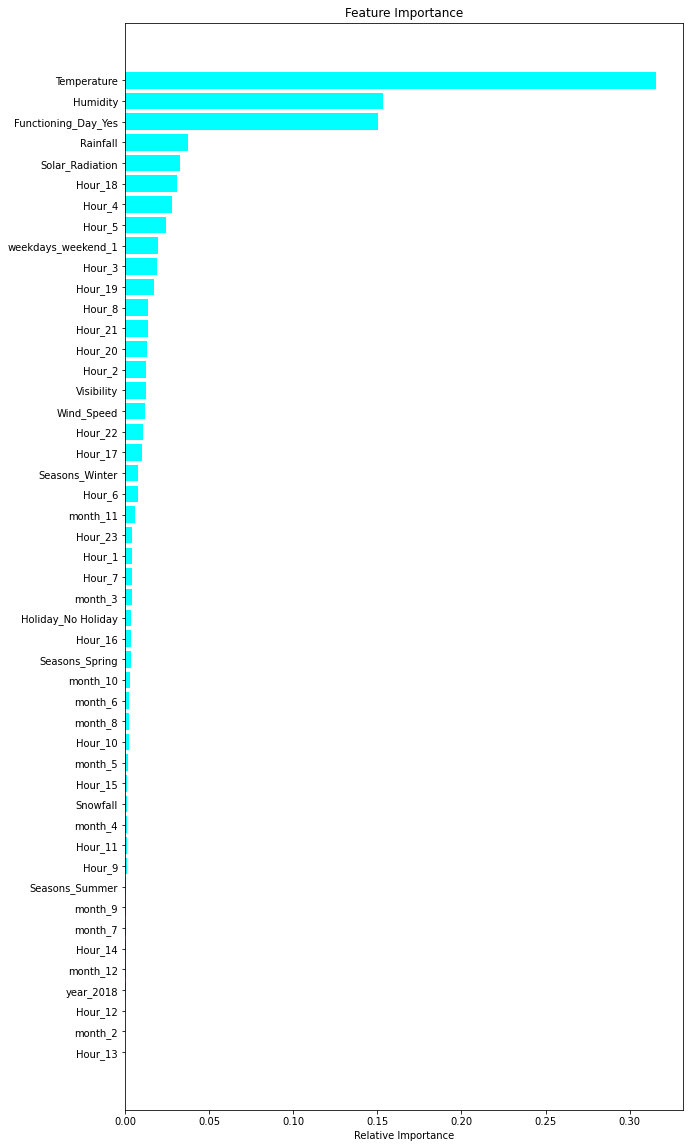

In [131]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='cyan', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**

In [132]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [133]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [134]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.8789016499095264
MSE : 18.64801713184794
RMSE : 4.3183349953249275
MAE : 3.2690035692731247
R2 : 0.8789016499095264
Adjusted R2 : 0.8761866939056298


**Looks like our r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [135]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [136]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 21.28944184250869
RMSE : 4.6140483138463875
MAE : 3.4928587865599914
R2 : 0.8652280396863458
Adjusted R2 : 0.8622065291328402


**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [137]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

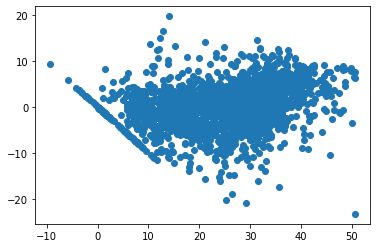

In [138]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [139]:
gb_model.feature_importances_

array([3.21437110e-01, 1.28054219e-01, 5.06472446e-04, 4.41033341e-04,
       4.82210501e-02, 6.50977064e-02, 3.00825496e-05, 4.41679040e-04,
       6.20291012e-03, 1.54723207e-02, 2.77923448e-02, 2.09197623e-02,
       5.54914116e-03, 1.38849071e-03, 9.51964101e-03, 0.00000000e+00,
       2.87933226e-03, 1.37560679e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.08156531e-04, 7.57741782e-03,
       3.03117662e-02, 1.74699066e-02, 1.14240782e-02, 1.55664225e-02,
       1.20487441e-02, 2.45479420e-04, 1.42322866e-05, 0.00000000e+00,
       3.35174157e-02, 2.23294271e-03, 1.74747832e-01, 1.26568964e-04,
       0.00000000e+00, 1.72209214e-03, 9.33502112e-05, 2.82254756e-04,
       4.18000398e-03, 0.00000000e+00, 2.66904099e-03, 0.00000000e+00,
       6.76468137e-03, 5.12015005e-03, 1.63151110e-04, 1.79854096e-02])

In [140]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [141]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [142]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning_Day_Yes,0.17
1,Humidity,0.13
5,Rainfall,0.07
4,Solar_Radiation,0.05
10,Hour_4,0.03
32,Seasons_Winter,0.03
24,Hour_18,0.03
47,weekdays_weekend_1,0.02
11,Hour_5,0.02


In [143]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [144]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

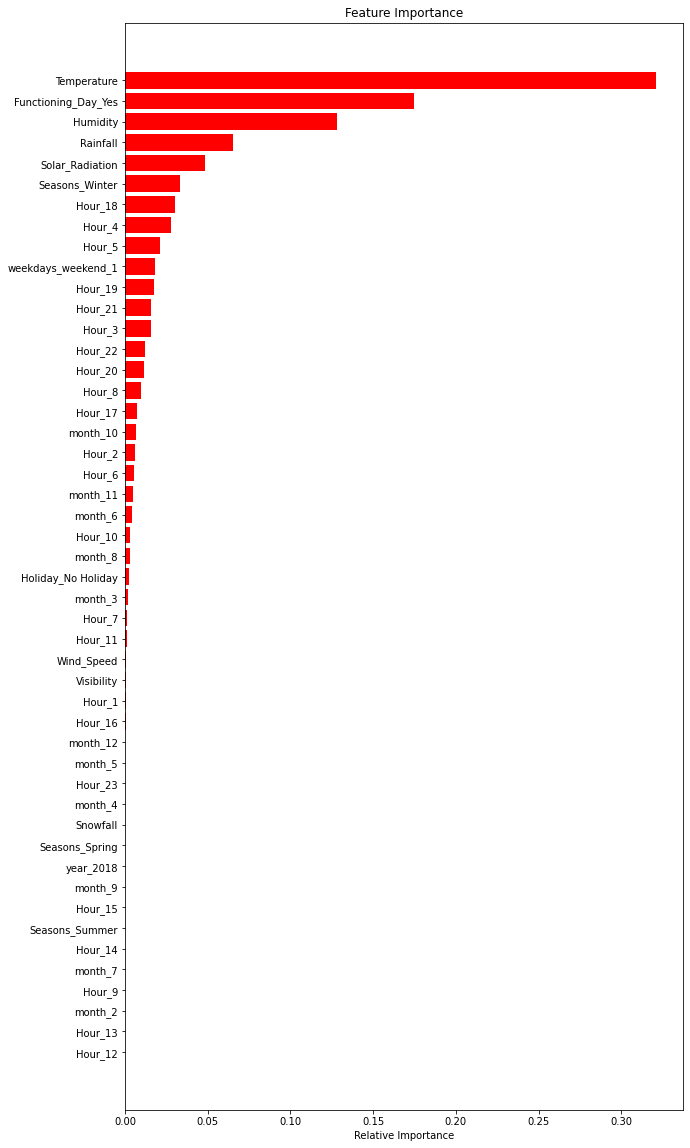

In [145]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Hyperparameter tuning**



Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

**Using GridSearchCV**

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

# **Gradient Boosting Regressor with GridSearchCV**

**Provide the range of values for chosen hyperparameters**

In [146]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [147]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

# **Importing Gradient Boosting Regressor**

In [148]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [149]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [150]:
gb_optimal_model = gb_grid.best_estimator_

In [151]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [152]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

**Model Performance**

In [153]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9515896672300013
MSE : 7.454740004128373
RMSE : 2.7303369762958516
MAE : 1.8489194833919358
R2 : 0.9515896672300013
Adjusted R2 : 0.9505043351548215




**Looks like our r2 score value is 0.95 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [154]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [155]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 12.392760556291105
RMSE : 3.520335290322657
MAE : 2.4005915565405354
R2 : 0.921548124829924
Adjusted R2 : 0.9197892784926219


**The r2_score for the test set is 0.92. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [156]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

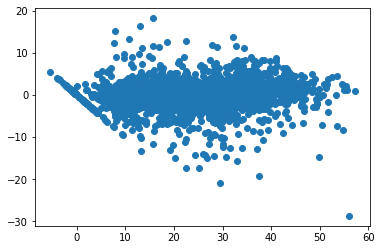

In [157]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [158]:
gb_optimal_model.feature_importances_

array([3.12057438e-01, 1.52960270e-01, 6.20316780e-03, 6.03743312e-03,
       3.75324776e-02, 4.41384879e-02, 1.25380735e-03, 9.51937002e-04,
       9.98653930e-03, 1.96911560e-02, 2.89529919e-02, 2.45449359e-02,
       6.18872117e-03, 3.32550727e-03, 1.20634772e-02, 4.66509851e-04,
       3.73626049e-03, 2.06003352e-03, 6.36119042e-05, 1.39325973e-04,
       9.77140091e-05, 5.27337742e-04, 1.33847427e-03, 9.51593158e-03,
       3.11372494e-02, 1.65223193e-02, 1.21776066e-02, 1.44682226e-02,
       9.91879886e-03, 2.41023598e-03, 3.67911329e-03, 1.06796008e-03,
       1.62472784e-02, 2.18064007e-03, 1.57198472e-01, 6.69617776e-04,
       7.75938658e-05, 1.32320249e-03, 1.09973153e-04, 1.66051097e-03,
       2.73793528e-03, 1.58083698e-03, 6.24598289e-03, 7.62045639e-05,
       6.35447256e-03, 4.56464936e-03, 3.85729791e-04, 2.33718468e-02])

In [159]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [160]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [161]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
34,Functioning_Day_Yes,0.16
1,Humidity,0.15
4,Solar_Radiation,0.04
5,Rainfall,0.04
10,Hour_4,0.03
24,Hour_18,0.03
47,weekdays_weekend_1,0.02
9,Hour_3,0.02
11,Hour_5,0.02


In [162]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [163]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

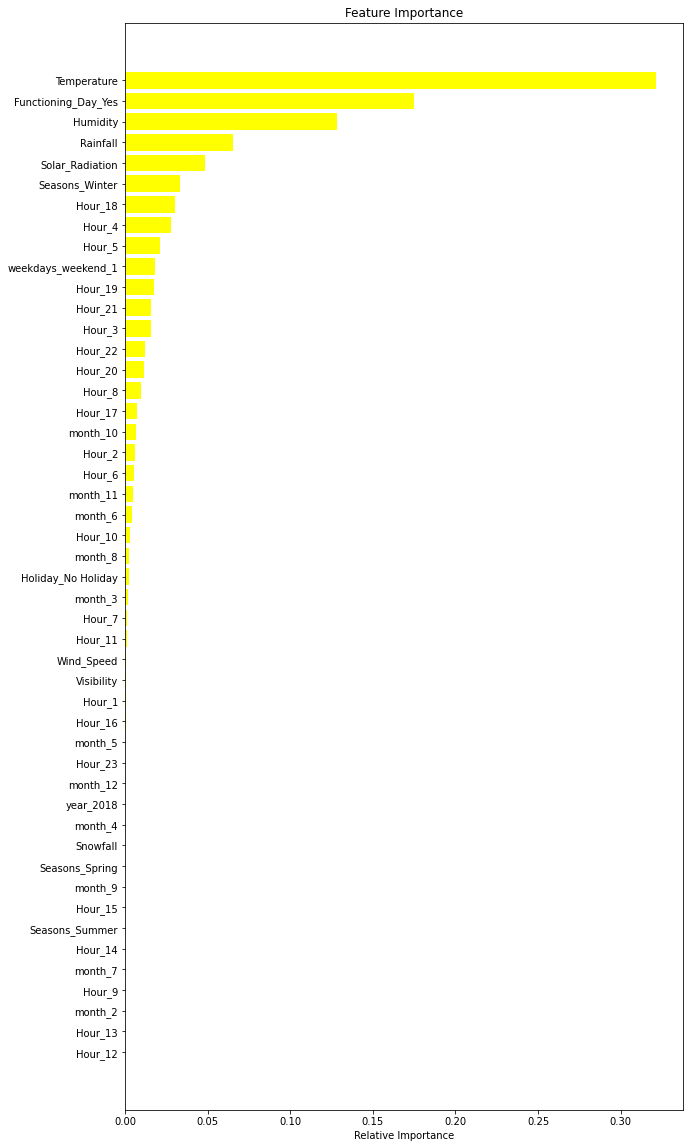

In [164]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='yellow', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **CONCLUSION**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 7 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree, Random Forest and XGBoost. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [165]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.474  35.078  5.923   
             1                Lasso regression   7.255  91.594  9.570   
             2                Ridge regression   4.474  35.078  5.923   
             3          Elastic net regression   5.792  57.571  7.588   
             4        Dicision tree regression   5.503  56.546  7.520   
             5        Random forest regression   0.805   1.564  1.250   
             6    Gradient boosting regression   3.269  18.648  4.318   
             7  Gradient Boosting gridsearchcv   1.849   7.455  2.730   
Test set     0               Linear regression   4.410  33.275  5.768   
             1                Lasso regression   7.456  96.775  9.837   
             2                Ridge regression   4.410  33.277  5.769   
             3      Elastic net regression Test  5.873  59.447  7.710   
             4        Dicision tree regression   5.822  62.680  7.917   
             5        Random forest regression   2.205  12.784  3.575   
             6    Gradient boosting regression   3.493  21.289  4.614   
             7  Gradient Boosting gridsearchcv   2.401  12.393  3.520   

                R2_score  Adjusted R2  
Training set 0     0.772         0.77  
             1     0.405         0.39  
             2     0.772         0.77  
             3     0.626         0.62  
             4     0.633         0.62  
             5     0.990         0.99  
             6     0.879         0.88  
             7     0.952         0.95  
Test set     0     0.789         0.78  
             1     0.387         0.37  
             2     0.789         0.78  
             3     0.624         0.62  
             4     0.603         0.59  
             5     0.919         0.92  
             6     0.865         0.86  
             7     0.922         0.92

• No overfitting is seen.

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of 99% and 95% recpectively for Train Set and 92% for Test set.

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model.

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.